# Jupiter Asset Management: Cross Sector Analytics

The purpose of this task is to conduct a corss sector analysis with data visualisation and machine learning techniques that help research analyst & fund manager uncover the 'correlation'& co_dependency relatinship between different equity sectors such as technology and consumer sector. This helps investors to construct a more diversified portfolio by uncovering 'correlated' sectors to capture a better risk-adjusted returns.

This task contains four parts: 

1. Data consolidation from different tables and sources
2. Data cleaning and outlier detection & treatment 
3. Provide investment insights to help the investment team to improve their investment decisions
4. Summary of assumption and limitation of research methods & models

a. Data source: the daily price movement of sector indexes from Quandl API; Outliers and polluted data added to test outlier detection methods from my local PC; Other data sources such as VIX from yahoo finance stored in my local PC

b. Data cleaning: I have mannually added 1.5% of polluted data in the dataset to run and test several outlier detection methods. More details will be explained in the later chapter.

c. Investment insights and signals: I will run explosive analytics to discovery co_dependency & behaviour similarity of different equity sectors mainly based on the daily price movement. This helps investors build a diversified portfolio by uncovering 'correlated' sectors to capture a better risk-adjusted returns in portfolio optimisation, smart beta and others. 

The co-movement test also includes a cointegration test among different sectors that can be used in pairs trading strategy. In contrast to correlation, cointegration does not reflect whether the pairs would move in the same or opposite direction, but can tell you whether the distance between them remains the same or stable over time. For investors, this means that the movement of these asset pairs is not related. However, in the longer term, the pairs may track a common average value. This analysis benefits market neutral strategy such as the pairs trading strategy, which capture the divergence within a pair assets as a statistical arbitrage opportunity as they will convrge in the long term. 

d. The assumption and limitation of the research will be addressed at the end of the task. 

In addition to the python task, there is a power BI data visualisation dash board that will allow investors to explore the sector correlation with flexibe input.

# Part one: Data Consolidation 

1. Quandl API: daily price movement of different  sector indexs
2. Local PC: Manual polluted data in the technology sector to run outlier detections for the next session / Other information such as VIX from Yahool

The task is to load and consolidate those data tables into one comprehensive table

In [1]:
import quandl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# loading quandl API 

quandl.ApiConfig.api_key = 'LZzzaRMJVHJ1d9d3WZbE'
quandl.ApiConfig.verify_ssl = False

# loading daily price movement of different sectors index data

Cocoa = quandl.get("BCIP/_SG2D",column_index='4')
Coffee = quandl.get("BCIP/_SG2I",column_index='4')
Corn = quandl.get("BCIP/_SG3C",column_index='4')
Wheat = quandl.get("BCIP/_SGSS",column_index='4')
Metals = quandl.get("BCIP/_SGTR",column_index='4')
Tobacco = quandl.get("BCIP/_ULFB",column_index='4')
Oil = quandl.get("BCIP/_V2BD",column_index='4')
HealthCare = quandl.get("BCIP/_V7BD",column_index='4')
Pharmaceuticals = quandl.get("BCIP/_V7DD",column_index='4')
Banks = quandl.get("BCIP/_V8B",column_index='4')
Financials = quandl.get("BCIP/_V8HB",column_index='4')
Software = quandl.get("BCIP/_V9BF",column_index='4')
Aerospace = quandl.get("BCIP/_VCBB",column_index='4')
Automobile = quandl.get("BCIP/_XFDB",column_index='4')
Chemicals = quandl.get("BCIP/_SCMX",column_index='4')
Aluminum = quandl.get("BCIP/_XBHB",column_index='4')
Gold = quandl.get("BCIP/_XBHF",column_index='4')
Information_Technology = quandl.get("BCIP/_X9HB",column_index='4');

C:\Users\wangy\anaconda3\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.quandl.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\wangy\anaconda3\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.quandl.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\wangy\anaconda3\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.quandl.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\wangy\anaconda3\lib\site-packages\urllib3\connectionpoo

In [3]:
# update column names and consolidate data tables into one table

Coffee.rename(columns={"Close": "Coffee"},inplace = True)
Cocoa.rename(columns={"Close": "Cocoa"},inplace = True)
Corn.rename(columns={"Close": "Corn"},inplace = True)
Wheat.rename(columns={"Close": "Wheat"},inplace = True)
Metals.rename(columns={"Close": "Metals"},inplace = True)
Tobacco.rename(columns={"Close": "Tobacco"},inplace = True)
Oil.rename(columns={"Close": "Oil"},inplace = True)
HealthCare.rename(columns={"Close": "HealthCare"},inplace = True)
Pharmaceuticals.rename(columns={"Close": "Pharmaceuticals"},inplace = True)
Banks.rename(columns={"Close": "Banks"},inplace = True)
Financials.rename(columns={"Close": "Financials"},inplace = True)
Software.rename(columns={"Close": "Software"},inplace = True)
Aerospace.rename(columns={"Close": "Aerospace"},inplace = True)
Automobile.rename(columns={"Close": "Automobile"},inplace = True)
Chemicals.rename(columns={"Close": "Chemicals"},inplace = True)
Aluminum.rename(columns={"Close": "Aluminum"},inplace = True)
Gold.rename(columns={"Close": "Gold"},inplace = True)
Information_Technology.rename(columns={"Close": "Information_Technology"},inplace = True)

# concat different data tables into one table

data = pd.concat([Cocoa, Coffee,Corn,Wheat,Metals,Tobacco,Oil,HealthCare,Pharmaceuticals,Banks,Financials,Software,Aerospace,Automobile,Chemicals,Aluminum,Gold,Information_Technology], axis=1)

In [4]:
# explore the data 

data.head()

,Cocoa,Coffee,Corn,Wheat,Metals,Tobacco,Oil,HealthCare,Pharmaceuticals,Banks,Financials,Software,Aerospace,Automobile,Chemicals,Aluminum,Gold,Information_Technology
Date,,,,,,,,,,,,,,,,,,
2010-08-11,112.94,130.80,336.76,26.14,276.87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-08-12,114.06,134.72,348.19,26.82,279.09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-08-13,113.31,134.76,352.73,26.48,276.21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-08-16,113.47,137.42,349.02,25.11,279.32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-08-17,113.82,135.29,355.00,24.66,283.09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# calculate the daily price return & price change with pct function
# drop rows that contain NaN value 

data = data.pct_change().dropna()

In [6]:
data.head()

,Cocoa,Coffee,Corn,Wheat,Metals,Tobacco,Oil,HealthCare,Pharmaceuticals,Banks,Financials,Software,Aerospace,Automobile,Chemicals,Aluminum,Gold,Information_Technology
Date,,,,,,,,,,,,,,,,,,
2013-01-18,-0.006531,0.005141,0.004146,0.013185,0.001121,0.008249,0.001764,0.007383,0.009024,-0.001963,0.003018,-0.003077,0.014877,-0.007764,0.005964,0.004746,0.008212,-0.002875
2013-01-22,-0.031532,-0.049277,0.001365,-0.015516,0.007647,-0.000370,0.015025,0.011038,0.029463,0.008407,0.009322,-0.004258,0.006900,0.004157,0.004512,0.020265,0.015466,0.001840
2013-01-23,0.000920,0.012104,-0.010625,-0.005592,0.002191,-0.010262,-0.003757,-0.007396,0.015574,-0.010096,-0.003127,0.002893,0.004416,-0.019603,-0.003369,-0.006870,-0.015862,0.011490
2013-01-24,-0.009080,-0.025555,0.004857,-0.008180,-0.005291,0.011721,-0.000833,0.009550,0.010342,-0.006026,-0.000624,0.007966,0.001515,0.001366,0.006656,-0.008421,-0.016941,-0.017452
2013-01-25,-0.009976,0.011958,-0.004833,0.010309,-0.010639,-0.001311,0.007686,0.011627,0.006343,-0.000738,0.001542,0.030041,0.004460,-0.012154,0.005441,-0.001668,-0.017885,0.002464


# Part Two: Outlier Detection 

An outlier is a data point that is significantly different from the remaining data. The data has a “normal” underlying structure (certain probability distribution, may contain linear relationship and or has certain clustering structure & density in the space), and anomalies are recognized as deviations from this normal pattern. 

Therefore, the first step is always explore the dataset and understand what a normal data structure should look like and then calculate the deviation of each data point to this normal structure (benchmark). 

I have uploaded a new table called data_contain_outliers from my local pc. This file contains 1.5% containmated data manually addedd in the information technology sector. The column contains outliers is called Information_Technology_Outlier. Another column named 'outlier' labels if a value in the technology sector is a outlier or not. 1 means outlier and 0 means inlier. The objective for this section is to identify those polluted data in the technology with approprate techniques and predict what the correct value should be to override incorrect value.

The following outlier detection methods will be applied:

1. Data visualisation and statistical test to check what a normal data pattern looks like.
2. Apply the following methods to detect outliers and check performance of each tool.

 2.1. Statistical methods - confidence interval & Z score for normal distribution data
 
 2.2. Linear method
 
 2.3. Proximity-Based (density, distance from Clustering) 
 
 2.4. Other methods if the above do not work well such as time series analysis, autoencoder
 

3. Finally, I will train a model to predict what the correct value to override the polluted data points.

In [7]:
# load the file called data_contain_outliers from my local pc 
# this file contains 1.5% of polluted data in the technology sector which will be used to run the test of outlier detection.
# This file also contain information on outlier label to confirm if the data has been polluted. This information will be used later just for demonstration purpose to prove the performance of different outlier detection method

from datetime import datetime

data_contain_outliers = pd.read_csv('Outlier.csv')
data_contain_outliers['Date']= pd.to_datetime(data_contain_outliers['Date'])
data_contain_outliers.set_index('Date',inplace = True)
data_contain_outliers.index = data.index
df = pd.concat([data,data_contain_outliers], axis = 1).dropna()

df.head() # check the consolidated data including both original data and polluted data

,Cocoa,Coffee,Corn,Wheat,Metals,Tobacco,Oil,HealthCare,Pharmaceuticals,Banks,...,Software,Aerospace,Automobile,Chemicals,Aluminum,Gold,Information_Technology,Information_Technology_Outlier,Outlier,VIX
Date,,,,,,,,,,,,,,,,,,,,,
2013-01-18,-0.006531,0.005141,0.004146,0.013185,0.001121,0.008249,0.001764,0.007383,0.009024,-0.001963,...,-0.003077,0.014877,-0.007764,0.005964,0.004746,0.008212,-0.002875,-0.002875,0,12.46
2013-01-22,-0.031532,-0.049277,0.001365,-0.015516,0.007647,-0.000370,0.015025,0.011038,0.029463,0.008407,...,-0.004258,0.006900,0.004157,0.004512,0.020265,0.015466,0.001840,0.001840,0,12.43
2013-01-23,0.000920,0.012104,-0.010625,-0.005592,0.002191,-0.010262,-0.003757,-0.007396,0.015574,-0.010096,...,0.002893,0.004416,-0.019603,-0.003369,-0.006870,-0.015862,0.011490,-0.041490,1,12.46
2013-01-24,-0.009080,-0.025555,0.004857,-0.008180,-0.005291,0.011721,-0.000833,0.009550,0.010342,-0.006026,...,0.007966,0.001515,0.001366,0.006656,-0.008421,-0.016941,-0.017452,-0.017452,0,12.69
2013-01-25,-0.009976,0.011958,-0.004833,0.010309,-0.010639,-0.001311,0.007686,0.011627,0.006343,-0.000738,...,0.030041,0.004460,-0.012154,0.005441,-0.001668,-0.017885,0.002464,0.002464,0,12.89


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2064 entries, 2013-01-18 to 2021-04-01
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Cocoa                           2064 non-null   float64
 1   Coffee                          2064 non-null   float64
 2   Corn                            2064 non-null   float64
 3   Wheat                           2064 non-null   float64
 4   Metals                          2064 non-null   float64
 5   Tobacco                         2064 non-null   float64
 6   Oil                             2064 non-null   float64
 7   HealthCare                      2064 non-null   float64
 8   Pharmaceuticals                 2064 non-null   float64
 9   Banks                           2064 non-null   float64
 10  Financials                      2064 non-null   float64
 11  Software                        2064 non-null   float64
 12  Aerospace       

In [9]:
# 0 represents correct data and 1 represents outliers. 
# Outliers represents around 1.5% of data points in the technology sector in cloumn technology with outlier column

df.Outlier.value_counts()

0    2034
1      30
Name: Outlier, dtype: int64

In [10]:
# the list of added outliers in the technology sector

true_outlier = list(df[df['Outlier']==1]['Information_Technology_Outlier'])
true_outlier

[-0.041489561,
 -0.197913792,
 -0.200505273,
 -0.065904129,
 0.132611637,
 0.225494835,
 -0.05553926,
 -0.04561591,
 -0.17359028199999998,
 0.06835269999999999,
 0.072655316,
 0.2269741,
 0.059127131,
 0.187366344,
 -0.079407525,
 0.22793491300000002,
 -0.018042216,
 0.213006814,
 0.17808919199999998,
 -0.166140889,
 0.030208138,
 0.041774142,
 0.19264111,
 0.021378288999999998,
 0.0759444,
 -0.03443108,
 0.052572109000000006,
 -0.117212241,
 0.07293463,
 0.124164886]

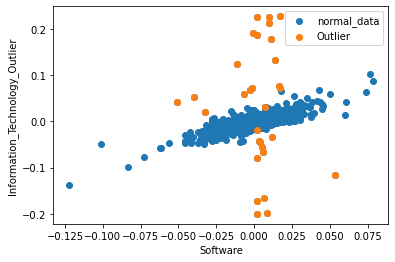

In [11]:
# display the distribution of outliers in the technology sector.

plt.scatter(df.Software, df.Information_Technology_Outlier)
plt.scatter(df[df['Outlier']==1].Software, df[df['Outlier']==1].Information_Technology_Outlier)
plt.legend(['normal_data', 'Outlier'])
plt.ylabel('Information_Technology_Outlier')
plt.xlabel('Software');

# 2.1.1 Statistical Outlier Detection methods

This method assume that the underlying data follow a normal distribution. Therefore need to check if that is the case and if yes, we can apply the confidence interval methods

Step one: run data visualisation, Quantile-Quantile method to check if data follow a normal distribution

Step two: use z score methods to predict 

Step three: compare the result and performance

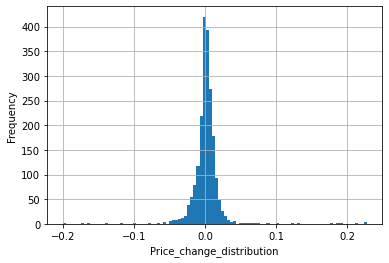

In [12]:
# check the if the data distribution looks like normal distribution, if yes, this meets the assumption of confidence interval methods
# the visualisation indicate a very symmetric long tail distribution so confidence interval method should work fine

df.Information_Technology_Outlier.hist(bins=100)
plt.ylabel('Frequency')
plt.xlabel('Price_change_distribution');

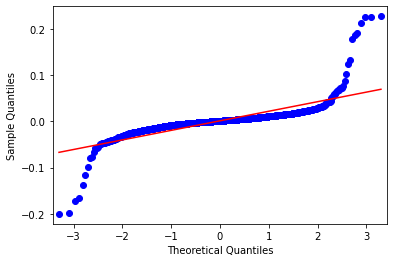

In [13]:
# run Quantile-Quantile Plot to test the normality 
# the result indicate that the tail doesn't follow normal distribution which may be due to the impact of outliers

from numpy.random import seed
from numpy.random import randn
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot

qqplot(df.Information_Technology_Outlier, line='s')
pyplot.show()

In [14]:
# apply Z score equal 3 to predict outliers (99.7% confidence interval)

threshold = 3

predict_outlier_z_score = []
for i in df.Information_Technology_Outlier:
    z = (i-df.Information_Technology_Outlier.mean())/df.Information_Technology_Outlier.std()
    if z > threshold:
        predict_outlier_z_score.append(i)
        
print('outlier in dataset is', predict_outlier_z_score)

outlier in dataset is [0.132611637, 0.225494835, 0.06835269999999999, 0.072655316, 0.2269741, 0.187366344, 0.22793491300000002, 0.213006814, 0.17808919199999998, 0.19264111, 0.0759444, 0.065036577, 0.067750213, 0.10321631099999999, 0.063488835, 0.087937658, 0.07293463, 0.124164886]


In [15]:
# check how many prediction are correct by inner join zs prediction and actual outlier list 

correct_predict_outlier_z_score = [x for x in true_outlier if x in predict_outlier_z_score]
correct_predict_outlier_z_score

[0.132611637,
 0.225494835,
 0.06835269999999999,
 0.072655316,
 0.2269741,
 0.187366344,
 0.22793491300000002,
 0.213006814,
 0.17808919199999998,
 0.19264111,
 0.0759444,
 0.07293463,
 0.124164886]

In [16]:
# Z score predicted 18 outliers which including 13 correct prodiction and 5 incorrect prediction. 65% accuracy 
# only 13 out of 30 outliers have been predicted correctly with the z score methods. 
# some hidden outliers within the confidence interval has not been identified

len(correct_predict_outlier_z_score)/len(predict_outlier_z_score)

0.7222222222222222

# 2.1.2 Linear Outlier Detecion Method

The linear model assume that there is a linear relationship between different sectors and they always move together. Therefore, we can use one sector as the benchmark of the other sector to detect potential outliers. 

Step one: Check if technology sector has a linear relationship with other sectors using correlation matrix, data visualsation and PCA method.

Step two: train a linear model to calculate the outlier score of each data points

Step three: select top 1.5% - 2% data points with the highest outlier score as outliers

Step four: check the result and performance

In [17]:
# step one: check if any linear correlation exists by using the correlation matrix technique

df.corr()['Information_Technology_Outlier']

Cocoa                             0.066772
Coffee                            0.069964
Corn                              0.035911
Wheat                            -0.006422
Metals                            0.137691
Tobacco                           0.284340
Oil                               0.252246
HealthCare                        0.365318
Pharmaceuticals                   0.284046
Banks                             0.312795
Financials                        0.371950
Software                          0.512463
Aerospace                         0.386649
Automobile                        0.342934
Chemicals                         0.421154
Aluminum                          0.302779
Gold                              0.125969
Information_Technology            0.595288
Information_Technology_Outlier    1.000000
Outlier                           0.189272
VIX                              -0.087254
Name: Information_Technology_Outlier, dtype: float64

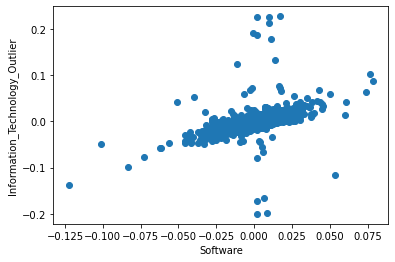

In [18]:
# it seems that the below 2 sectors have a strong linear relationship that can be used to detect outliers

plt.scatter(df.Software, df.Information_Technology_Outlier)
plt.ylabel('Information_Technology_Outlier')
plt.xlabel('Software');

In [19]:
# use PCA to confirm if a linear relationship exist between the above two sectors 

from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler # reduce the impact of outliers themselves

pca = PCA(n_components=1)
df['PCA'] = pca.fit_transform(RobustScaler().fit_transform(df[['Information_Technology_Outlier','Software']]))
print(pca.explained_variance_ratio_)

[0.84201439]


In [20]:
# Step two: train a linear model MCD detector and calculate outlier scores 
# Select around top 1.5% - 2% data that have the highest outlier score as outliers
# Display outliers that have been predicted correctly by inner join prediction and actual outliers to demonstrate model performance

from sklearn.preprocessing import MinMaxScaler
from pyod.models.mcd import MCD

clf = MCD()
clf.fit(MinMaxScaler().fit_transform(df[['Software','Information_Technology_Outlier']]))
df['MCD_outlier_score'] = clf.decision_function(MinMaxScaler().fit_transform(df[['Software','Information_Technology_Outlier']]))
MCD_predict_outlier = [x for x in true_outlier if x in list(df[df['MCD_outlier_score']>75]['Information_Technology_Outlier'])]
MCD_predict_outlier

[-0.041489561,
 -0.197913792,
 -0.200505273,
 -0.065904129,
 0.132611637,
 0.225494835,
 -0.05553926,
 -0.04561591,
 -0.17359028199999998,
 0.06835269999999999,
 0.072655316,
 0.2269741,
 0.059127131,
 0.187366344,
 -0.079407525,
 0.22793491300000002,
 0.213006814,
 0.17808919199999998,
 -0.166140889,
 0.041774142,
 0.19264111,
 0.021378288999999998,
 0.0759444,
 -0.03443108,
 0.052572109000000006,
 -0.117212241,
 0.07293463,
 0.124164886]

In [21]:
# linear model MCD predicted 37 outliers which including 28 correct prodiction and 9 incorrect prediction. 75.7% accuracy 
# 28 out of 30 outliers have been predicted correctly with MCD methods. 
# this is a good performance 

len(MCD_predict_outlier)/len(list(df[df['MCD_outlier_score']>75]['Information_Technology_Outlier']))

0.7567567567567568

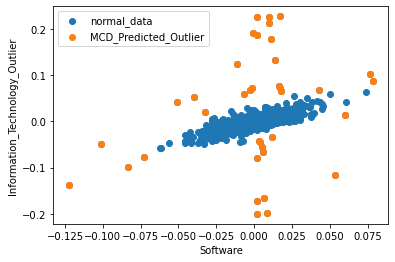

In [22]:
# display the predicted outliers by MCD model 

plt.scatter(df.Software, df.Information_Technology_Outlier)
plt.scatter(df[df['MCD_outlier_score']>75]['Software'],df[df['MCD_outlier_score']>75]['Information_Technology_Outlier'])
plt.legend(['normal_data', 'MCD_Predicted_Outlier'])
plt.ylabel('Information_Technology_Outlier')
plt.xlabel('Software');

# 2.1.3 Clustering-Based Local Outlier Factor

This model assumes that data is concentrated within cluster(s). The data points away from the central cluster(s) will be identified as outliers.   

Step one: Check if technology sector has a cluster structure or density using data visualsation. 

Step two: train a cluster model to calculate the outlier score of each data points

step three: select top 1.5% - 2% data points with the highest outlier score as outliers

Step four: check the result and performance

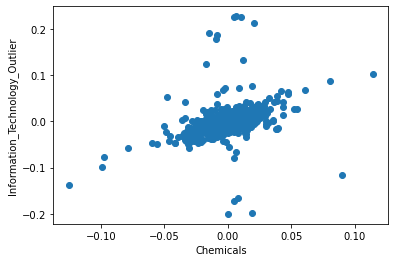

In [23]:
# step one: check the clustering structure with several different sectors 
# It can been seen that there is a custering structure via checking data visualisation

plt.scatter(df.Chemicals, df.Information_Technology_Outlier)
plt.ylabel('Information_Technology_Outlier')
plt.xlabel('Chemicals');

In [24]:
# step two: train the CBLOF detector and calculate outlier scores
# Select around top 1.5% - 2% data that have the highest outlier score as outliers
# Display outliers that have been predicted correctly by inner join prediction and actual outliers to demonstrate model performance


from sklearn.preprocessing import RobustScaler
from pyod.models.cblof import CBLOF

clf = CBLOF()
clf.fit(RobustScaler().fit_transform(df[['Software','Chemicals','Information_Technology_Outlier']]))

df['CBLOF_outlier_score'] = clf.decision_function(RobustScaler().fit_transform(df[['Software','Chemicals','Information_Technology_Outlier']]))

CBLOF_predict_outlier = [x for x in true_outlier if x in list(df[df['CBLOF_outlier_score']>5]['Information_Technology_Outlier'])]
CBLOF_predict_outlier

C:\Users\wangy\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[-0.197913792,
 -0.200505273,
 -0.065904129,
 0.132611637,
 0.225494835,
 -0.17359028199999998,
 0.06835269999999999,
 0.072655316,
 0.2269741,
 0.187366344,
 -0.079407525,
 0.22793491300000002,
 0.213006814,
 0.17808919199999998,
 -0.166140889,
 0.041774142,
 0.19264111,
 0.0759444,
 0.052572109000000006,
 -0.117212241,
 0.07293463,
 0.124164886]

In [25]:
# linear model MCD predicted 37 outliers which including 22 correct prodiction and 15 incorrect prediction. 60% accuracy 
# only 22 out of 30 outliers have been predicted correctly with CBLOF methods. 
# this is a ok performance but not as good as the linear model

len(CBLOF_predict_outlier)/len(list(df[df['CBLOF_outlier_score']>5]['Information_Technology_Outlier']))

0.5945945945945946

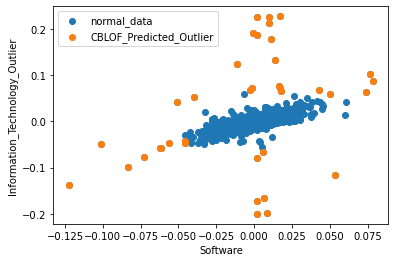

In [26]:
plt.scatter(df.Software, df.Information_Technology_Outlier)
plt.scatter(df[df['CBLOF_outlier_score']>5]['Software'],df[df['CBLOF_outlier_score']>5]['Information_Technology_Outlier'])
plt.legend(['normal_data', 'CBLOF_Predicted_Outlier','Correct_predicted_outlier'])
plt.ylabel('Information_Technology_Outlier')
plt.xlabel('Software');

In [27]:
# Based on the above information, the linear model will be used to detect outliers due to its performance

# 2.2 Predict Correct Value to Replace Polluted Data

The purpose of this part is to train a machine learning molde to estimate correct value to replace those polluted data points in the technology sector. There are three steps listed below: 

Step 1: use mutual information method to select relevant features.

Step 2: use grid search to optimise machine learning model hyper parameters.

Step 3: train a model to predict the polluted data points in the technology sector.  

In [28]:
# select featurs based on mutual information method

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

a = df[df['Outlier']==0].drop(['MCD_outlier_score', 'CBLOF_outlier_score','Information_Technology','Information_Technology_Outlier','PCA'], axis=1)
y = df[df['Outlier']==0]['Information_Technology_Outlier']
X = SelectKBest(mutual_info_regression, k=2).fit_transform(a, y) # top 2 features used to predict technology sector (Software and Chemicals)

In [29]:
# parameter optimization with GridSearch

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(max_depth=4, random_state=0)

# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [1, 2, 3, 4, 10],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [0, 100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)

grid_search.fit(X, y)

grid_search.best_params_

Fitting 3 folds for each of 450 candidates, totalling 1350 fits


C:\Users\wangy\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.39680324 0.39382998 0.4019026  0.39457757        nan
 0.39890789 0.39707908 0.38891456 0.39567106        nan 0.39672268
 0.4013776  0.39585392 0.39936402        nan 0.40760851 0.39820908
 0.39888878 0.39645551        nan 0.39357502 0.39177722 0.39704219
 0.39534549        nan 0.39849324 0.39845448 0.39775348 0.39837338
        nan 0.39030436 0.40314254 0.39731613 0.39902665        nan
 0.38999427 0.39909022 0.39853766 0.39739667        nan 0.39578785
 0.39812867 0.3987024  0.39862698        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        n

{'bootstrap': True,
 'max_depth': 4,
 'max_features': 2,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 100}

In [30]:
# update hyper parameters and train & predict the polluted data

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

regr = RandomForestRegressor(max_depth=4, random_state=0, min_samples_split =8, n_estimators = 300, min_samples_leaf = 3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
regr.fit(X_train, y_train)

# predict and replace incorrect value in the technology sector

predict_correct_value = pd.DataFrame(regr.predict(df[df['Outlier']==1][['Software','Chemicals']]))
predict_correct_value.rename(columns={0: "Predict_Value"},inplace = True)

# comparing the prediction result with actual value and polluted data ;
# the prediction is a great improvement compared with the polluted data

predict_correct_value.index = df[df['Outlier']==1].index
technology = df[df['Outlier']==1][['Information_Technology','Information_Technology_Outlier']]
pd.concat([predict_correct_value,technology], axis = 1)

,Predict_Value,Information_Technology,Information_Technology_Outlier
Date,,,
2013-01-23,0.000837,0.011490,-0.041490
2013-02-27,0.007800,0.008979,-0.197914
2013-03-13,0.000866,0.000020,-0.200505
2013-03-20,0.005380,0.006590,-0.065904
2013-04-23,0.014113,0.013261,0.132612
2013-07-01,0.007607,0.007255,0.225495
2013-07-03,0.001766,0.005554,-0.055539
2013-07-12,0.001305,0.002562,-0.045616
2013-07-19,0.003941,-0.017359,-0.173590


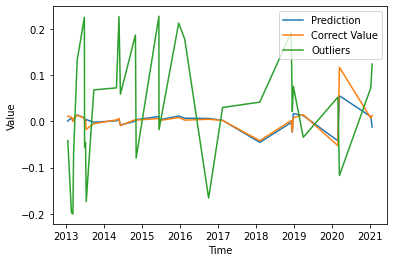

In [31]:
# data visualisation to check the prediction result: predicted result, actual results and polluted data 
# It is very clear that the prediction result is very close to the real dataset

plt.plot(predict_correct_value)
plt.plot(df[df['Outlier']==1]['Information_Technology'])
plt.plot(df[df['Outlier']==1]['Information_Technology_Outlier'])
plt.legend(['Prediction', 'Correct Value', 'Outliers'])
plt.ylabel('Value')
plt.xlabel('Time');

In [32]:
# Override the polluted data points in the technology sector with ML prediction:

df[df['Outlier']==1]['Information_Technology_Outlier']= predict_correct_value

<ipython-input-32-1f8f3156b60c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df['Outlier']==1]['Information_Technology_Outlier']= predict_correct_value


# Part three: Investment insights
    
1. Explosive analytics to discovery the similarity of different sectors based on the daily price movement. This helps investors build a diversified portfolio by improve asset allocation in different sectors to optimise exposrue due to sector correlation and or other dependency structure. Some techniques including covariance matrix/corrlation matrix method, robust covariance estimation (shrinkage and MinCovDet) and clustering technique. 

    1.1. Covariance matrix/corrlation matrix method: This traditional covariance estimation method in portfolio theory may not be accurate as this technique can be sensitive to outlier and instable correlation between asstes (correlation break). 

    1.2. Robust covariance estimation (Shrunk Covariance and MinCovDet) : Improve covariance estimation and mitigate the impact of outliers and/or market noises in high dimension data. Shrunk Covariance optimise the estimation in high dimension data and MinCovDet redue the impact of noise & outliers. 

    1.3. Clustering: improve the estimation of similarity and dependency relationship between different sectors by overcoming the limitation of linear correlation. Clustering can detect none linear dependency in addition to the linear correlation. 


2. Explore if there are stable co-movement relationship including rolling correlation and Cointegration between different sectors. This information can be used to formulate pairs trading strategy. Some techniques including: 


     2.1. Rolling correlation: observe the evolution of linear dependency over time between different sectors to test the stability of linear dependency. 
     
     2.2. Cointegration and Stationarity test: In contrast to correlation, cointegration does not reflect whether the pairs would move in the same or opposite direction, but can tell you whether the distance between them remains the same or stable over time. For investors, this means that the movement of these asset pairs is not related. However, in the longer term, the pairs may track a common average value. This analysis benefits market neutral strategy such as the pairs trading strategy, which capture the divergence within a pair assets as a statistical arbitrage opportunity as they will convrge in the long term. For example, assets A and B may not be correlated, but the return spread between A and B can be stable over time which provide arbitrage opportunity. 

# 3.1. Analytics: Similarity & Dependency Estimation

1. Traditional Correlation Matrix Heatmap
2. Robust covariance estimation to improve performce in high dimension data and or reducing impact of outliers
3. Clustering technique to uncover none linear relationship

# 3.1.1. Traditional Correlation Matrix Heatmap

1. Calculate correlation matrix
2. Data visualisation with heatmap

In [33]:
# calculate the correlation matrix with python

correlation_matrix =df.drop(['MCD_outlier_score', 'CBLOF_outlier_score','Information_Technology_Outlier','PCA','Outlier','VIX'], axis=1).corr()
correlation_matrix

,Cocoa,Coffee,Corn,Wheat,Metals,Tobacco,Oil,HealthCare,Pharmaceuticals,Banks,Financials,Software,Aerospace,Automobile,Chemicals,Aluminum,Gold,Information_Technology
Cocoa,1.000000,0.105320,0.007187,0.042302,0.086497,0.048692,0.070313,0.039659,0.044430,0.063791,0.080409,0.091170,0.073647,0.068169,0.109353,0.091350,0.047676,0.098780
Coffee,0.105320,1.000000,0.125433,0.127320,0.137949,0.040033,0.072806,0.043564,0.051134,0.012482,0.030368,0.043878,0.035117,0.033183,0.061799,0.045280,0.085391,0.060522
Corn,0.007187,0.125433,1.000000,0.599929,0.115748,0.057752,0.108408,0.093017,0.047000,0.057951,0.065699,0.077031,0.074272,0.101755,0.122624,0.080314,0.058938,0.080124
Wheat,0.042302,0.127320,0.599929,1.000000,0.074370,0.029012,0.078692,0.070619,0.052145,0.042538,0.044794,0.038496,0.042759,0.058743,0.065026,0.063800,0.042508,0.032000
Metals,0.086497,0.137949,0.115748,0.074370,1.000000,0.130383,0.224646,0.134557,0.104680,0.130549,0.164704,0.180938,0.182885,0.170107,0.242765,0.298934,0.412126,0.187778
Tobacco,0.048692,0.040033,0.057752,0.029012,0.130383,1.000000,0.333168,0.422385,0.282894,0.428694,0.526621,0.419146,0.442950,0.402099,0.523048,0.342007,0.122792,0.482987
Oil,0.070313,0.072806,0.108408,0.078692,0.224646,0.333168,1.000000,0.467043,0.376013,0.611209,0.619387,0.470894,0.544771,0.494612,0.617238,0.550374,0.162705,0.500695
HealthCare,0.039659,0.043564,0.093017,0.070619,0.134557,0.422385,0.467043,1.000000,0.515840,0.557585,0.628647,0.643927,0.589024,0.503425,0.617722,0.443018,0.083090,0.640027
Pharmaceuticals,0.044430,0.051134,0.047000,0.052145,0.104680,0.282894,0.376013,0.515840,1.000000,0.399027,0.441619,0.500673,0.453170,0.365775,0.446541,0.336894,0.088228,0.501745
Banks,0.063791,0.012482,0.057951,0.042538,0.130549,0.428694,0.611209,0.557585,0.399027,1.000000,0.942223,0.578173,0.666708,0.623771,0.695543,0.578891,0.033520,0.557521


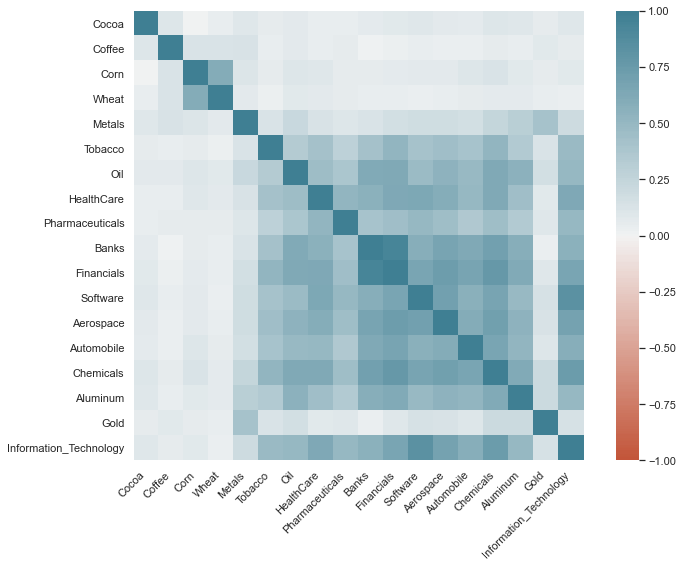

In [34]:
import seaborn as sns; sns.set_theme() 

sns.set(rc={'figure.figsize':(11.7,8.27)})

ax = sns.heatmap(
    correlation_matrix, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

# 3.1.2. Robust Covariance Estimation: Shrunk Covariance and MinCovDet 

This method improve the estimation by reducing the impact of high dimensions, outliers and market noise

Shrunk Covariance: robust covariance estimation to improve performce in high dimension data

MinCovDet: Robust covariance estimation to improve performce by reducing the impact of noises and outliers

In [35]:
# calculate the Shrunk Covariance and create covariance matrix

from sklearn.covariance import ShrunkCovariance

Sample = df.drop(['MCD_outlier_score', 'CBLOF_outlier_score','Information_Technology_Outlier','PCA','Outlier','VIX'], axis=1)
cov = ShrunkCovariance().fit(Sample)
Shrunk_Covariance = pd.DataFrame(cov.covariance_)

# update column and row to build matrix

sector = ['Cocoa','Coffee','Corn','Wheat','Metals','Tobacco','Oil','HealthCare','Pharmaceuticals','Banks','Financials','Software','Aerospace','Automobile','Chemicals','Aluminum','Gold','Information_Technology']
Shrunk_Covariance.columns = sector
Shrunk_Covariance.index = sector
Shrunk_Covariance

,Cocoa,Coffee,Corn,Wheat,Metals,Tobacco,Oil,HealthCare,Pharmaceuticals,Banks,Financials,Software,Aerospace,Automobile,Chemicals,Aluminum,Gold,Information_Technology
Cocoa,0.000250,0.000030,0.000001,0.000010,0.000011,0.000009,0.000025,0.000008,0.000013,0.000016,0.000016,0.000017,0.000016,0.000018,0.000020,0.000031,0.000015,0.000019
Coffee,0.000030,0.000387,0.000031,0.000037,0.000022,0.000009,0.000033,0.000012,0.000019,0.000004,0.000008,0.000011,0.000009,0.000011,0.000015,0.000020,0.000035,0.000015
Corn,0.000001,0.000031,0.000204,0.000120,0.000013,0.000009,0.000034,0.000017,0.000012,0.000013,0.000012,0.000013,0.000014,0.000024,0.000020,0.000025,0.000017,0.000013
Wheat,0.000010,0.000037,0.000120,0.000261,0.000009,0.000005,0.000028,0.000015,0.000016,0.000011,0.000009,0.000008,0.000009,0.000016,0.000012,0.000022,0.000014,0.000006
Metals,0.000011,0.000022,0.000013,0.000009,0.000100,0.000013,0.000044,0.000016,0.000017,0.000019,0.000019,0.000019,0.000022,0.000026,0.000025,0.000058,0.000075,0.000020
Tobacco,0.000009,0.000009,0.000009,0.000005,0.000013,0.000181,0.000097,0.000073,0.000069,0.000092,0.000088,0.000066,0.000078,0.000089,0.000080,0.000097,0.000033,0.000075
Oil,0.000025,0.000033,0.000034,0.000028,0.000044,0.000097,0.000592,0.000155,0.000177,0.000252,0.000199,0.000144,0.000185,0.000212,0.000182,0.000303,0.000084,0.000151
HealthCare,0.000008,0.000012,0.000017,0.000015,0.000016,0.000073,0.000155,0.000226,0.000144,0.000136,0.000119,0.000116,0.000118,0.000127,0.000108,0.000144,0.000025,0.000114
Pharmaceuticals,0.000013,0.000019,0.000012,0.000016,0.000017,0.000069,0.000177,0.000144,0.000426,0.000138,0.000119,0.000129,0.000129,0.000132,0.000111,0.000155,0.000038,0.000127
Banks,0.000016,0.000004,0.000013,0.000011,0.000019,0.000092,0.000252,0.000136,0.000138,0.000334,0.000223,0.000130,0.000166,0.000197,0.000151,0.000234,0.000013,0.000124


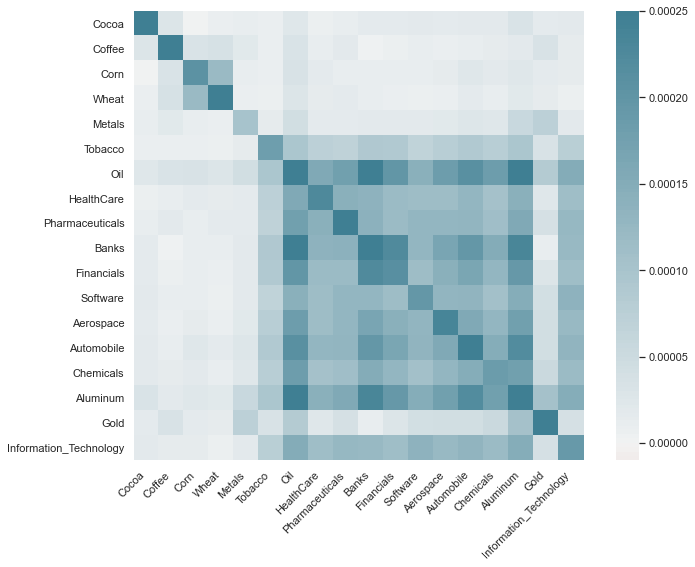

In [36]:
import seaborn as sns; sns.set_theme()

sns.set(rc={'figure.figsize':(11.7,8.27)})

ax = sns.heatmap(Shrunk_Covariance,cmap=sns.diverging_palette(20, 220, n=200),square=True,vmin=-0.00001, vmax=0.00025, center=0)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

# Compared with the traditional method: Shrunk_Covariance identified a stronge sector return relationship with oil and banking. This relationship is less obvious in the traditional correlation/covariance estimation method
# However, the result of Shrunk_Covariance is mostly consistent with the tradiational correlation matrix as the dimension of the dataset is relative small: only 17 sectorsonce the dimension increase for example comparing 100 stocks, the performnce of Shrunk_Covariance will normally be much better than tradiational covariance/correlaton matrix

In [37]:
# train and create the MinCovDet covariance estimation

from sklearn.covariance import MinCovDet

Sample = df.drop(['MCD_outlier_score', 'CBLOF_outlier_score','Information_Technology_Outlier','PCA','Outlier','VIX'], axis=1)
cov1 = MinCovDet().fit(Sample)
MinCovDet_Covariance = pd.DataFrame(cov1.covariance_)

# update column and row to build matrix

sector = ['Cocoa','Coffee','Corn','Wheat','Metals','Tobacco','Oil','HealthCare','Pharmaceuticals','Banks','Financials','Software','Aerospace','Automobile','Chemicals','Aluminum','Gold','Information_Technology']
MinCovDet_Covariance.columns = sector
MinCovDet_Covariance.index = sector
MinCovDet_Covariance

,Cocoa,Coffee,Corn,Wheat,Metals,Tobacco,Oil,HealthCare,Pharmaceuticals,Banks,Financials,Software,Aerospace,Automobile,Chemicals,Aluminum,Gold,Information_Technology
Cocoa,2.264792e-04,2.248813e-05,0.000001,1.352281e-05,0.000004,6.320259e-07,0.000006,-2.739486e-06,2.047575e-07,0.000002,0.000001,3.225721e-06,0.000003,0.000004,0.000005,0.000015,0.000013,8.796736e-07
Coffee,2.248813e-05,3.456711e-04,0.000026,2.475869e-05,0.000019,4.151593e-06,0.000009,-5.905313e-07,9.106397e-07,-0.000002,-0.000001,-6.488526e-07,-0.000005,-0.000001,0.000002,0.000013,0.000031,9.184003e-07
Corn,1.425487e-06,2.586789e-05,0.000181,1.309393e-04,0.000010,9.663166e-06,0.000024,7.732182e-06,2.070306e-06,0.000006,0.000006,6.557505e-06,0.000004,0.000009,0.000013,0.000014,0.000007,7.446013e-06
Wheat,1.352281e-05,2.475869e-05,0.000131,2.397333e-04,0.000005,5.789852e-06,0.000019,7.450888e-06,1.613390e-07,0.000007,0.000005,5.919670e-06,0.000004,0.000006,0.000007,0.000013,0.000002,4.108673e-06
Metals,4.082125e-06,1.856063e-05,0.000010,5.214262e-06,0.000064,4.921410e-06,0.000033,6.321229e-06,7.991437e-06,0.000009,0.000008,9.667950e-06,0.000011,0.000013,0.000014,0.000042,0.000057,1.047776e-05
Tobacco,6.320259e-07,4.151593e-06,0.000010,5.789852e-06,0.000005,8.425879e-05,0.000026,2.214489e-05,2.926778e-05,0.000024,0.000026,2.467752e-05,0.000026,0.000032,0.000031,0.000031,0.000016,2.862284e-05
Oil,5.582675e-06,9.069256e-06,0.000024,1.924786e-05,0.000033,2.577127e-05,0.000354,7.165788e-05,9.818290e-05,0.000105,0.000077,6.964096e-05,0.000083,0.000098,0.000090,0.000166,0.000068,7.272270e-05
HealthCare,-2.739486e-06,-5.905313e-07,0.000008,7.450888e-06,0.000006,2.214489e-05,0.000072,1.087037e-04,7.137503e-05,0.000059,0.000049,5.893255e-05,0.000052,0.000054,0.000047,0.000067,0.000011,5.161106e-05
Pharmaceuticals,2.047575e-07,9.106397e-07,0.000002,1.613390e-07,0.000008,2.926778e-05,0.000098,7.137503e-05,2.381028e-04,0.000065,0.000053,6.913571e-05,0.000063,0.000060,0.000056,0.000075,0.000017,6.235939e-05
Banks,1.803186e-06,-1.852438e-06,0.000006,6.954461e-06,0.000009,2.395743e-05,0.000105,5.910013e-05,6.465878e-05,0.000135,0.000090,6.032941e-05,0.000069,0.000080,0.000060,0.000097,-0.000009,5.575006e-05


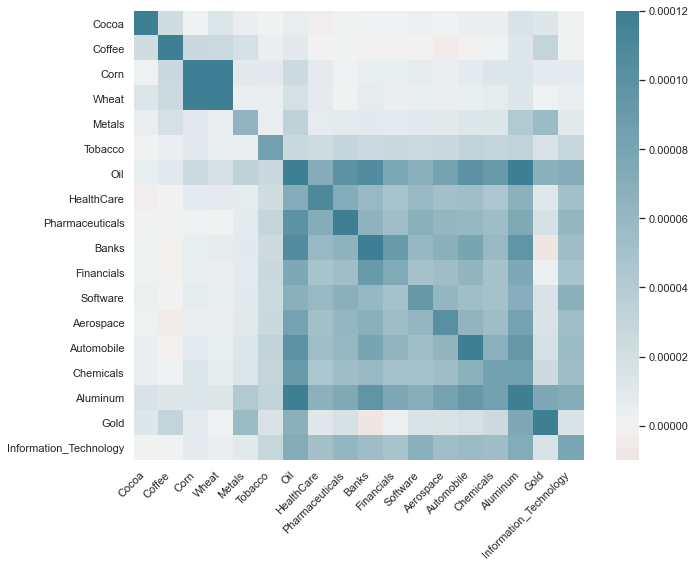

In [38]:
import seaborn as sns; sns.set_theme()

sns.set(rc={'figure.figsize':(11.7,8.27)})

ax = sns.heatmap(MinCovDet_Covariance,cmap=sns.diverging_palette(20, 220, n=200),square=True,vmin=-0.00001, vmax=0.00012, center=0)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

# the matrix has been demonstrated below and analyts with expert knowledge can check and decide what methods makes more sense in real world context

In [39]:
# select an approprate matrix based on expert knowledge and experience. the matrix has been demonstrated below and analyts with expert knowledge can check and decide what methods makes more sense in real world context

# 3.1.3. Clustering:  Sector Risk and Return 

Identify the similarity of sectors based on risk and return

1. risk: standard deviation of return
2. return: median price change

Output: a cluster label for each sector

In [40]:
annual_return = Sample.groupby(by=[Sample.index.month, Sample.index.year]).mean().median()
standard_deviation = Sample.groupby(by=[Sample.index.month, Sample.index.year]).std().median()
sector_annual = pd.DataFrame({'annual_return': annual_return,'standard_deviation': standard_deviation,})

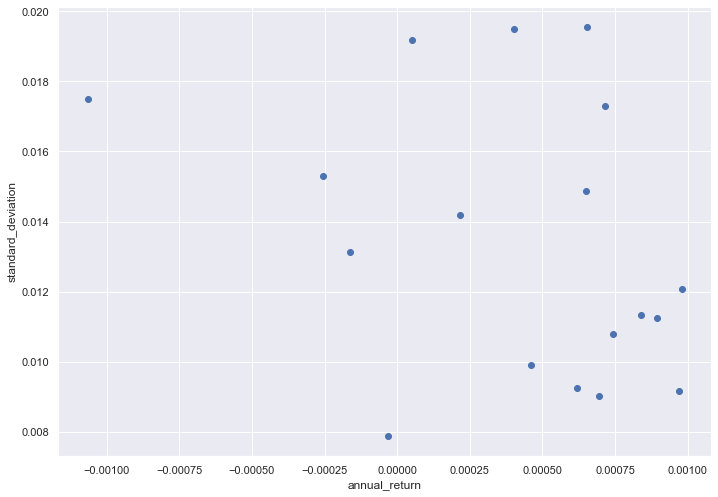

In [41]:
plt.scatter(annual_return,standard_deviation)
plt.ylabel('standard_deviation')
plt.xlabel('annual_return');

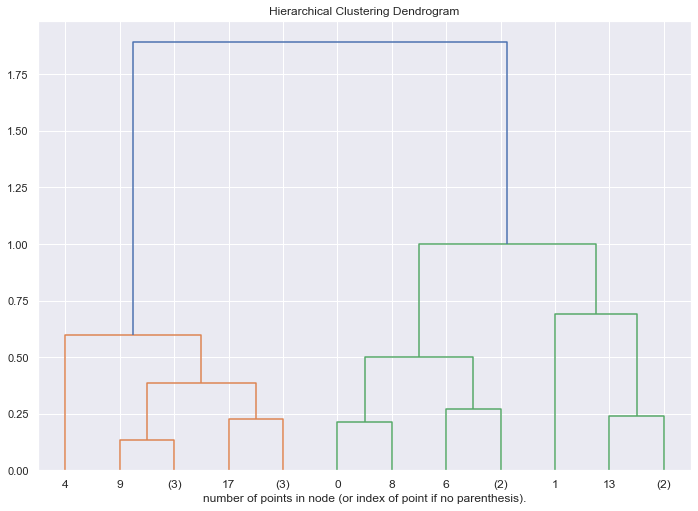

In [42]:
# Apply custering technique to explore the structure and check how many clusters
# It seems that there are three clusters within the data. 

import numpy as np
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

input_s = MinMaxScaler().fit_transform(sector_annual)

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(input_s)
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("number of points in node (or index of point if no parenthesis).")
plt.show()

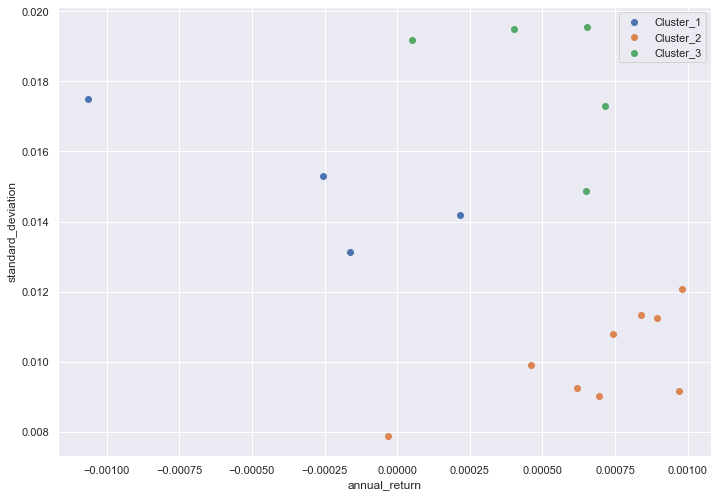

In [43]:
# predict cluster lable and provide data visualisation

sector_annual['Cluster'] = AgglomerativeClustering(n_clusters = 3).fit_predict(input_s)

plt.scatter(sector_annual[sector_annual['Cluster'] ==0]['annual_return'],sector_annual[sector_annual['Cluster'] ==0]['standard_deviation'])
plt.scatter(sector_annual[sector_annual['Cluster'] ==1]['annual_return'],sector_annual[sector_annual['Cluster'] ==1]['standard_deviation'])
plt.scatter(sector_annual[sector_annual['Cluster'] ==2]['annual_return'],sector_annual[sector_annual['Cluster'] ==2]['standard_deviation'])
plt.legend(['Cluster_1', 'Cluster_2', 'Cluster_3'])
plt.ylabel('standard_deviation')
plt.xlabel('annual_return');

In [44]:
sector_annual

,annual_return,standard_deviation,Cluster
Cocoa,0.000648,0.014868,2
Coffee,-0.001065,0.017485,0
Corn,-0.000161,0.013119,0
Wheat,-0.000256,0.015298,0
Metals,-0.000031,0.007881,1
Tobacco,0.000461,0.009900,1
Oil,0.000050,0.019169,2
HealthCare,0.000894,0.011235,1
Pharmaceuticals,0.000716,0.017300,2
Banks,0.000979,0.012064,1


# 3.2. Co_movement Analytics for Paris Trading Strategy

 2.1. Rolling correlation: observe the evolution of linear dependency over different period of time between different sectors to test the stability of co-movement. 

 2.2. Cointegration and Stationarity test: In contrast to correlation, cointegration does not reflect whether the pairs would move in the same or opposite direction, but can tell you whether the distance between them remains the same or stable over time. For investors, this means that the movement of these asset pairs is not related. However, in the longer term, the pairs may track a common average value. 

# 3.2.1 Rolling correlation 

This analytics helps to estimate the probability of correlation break and assess the stability of the linear dependency

Note: I only test the co_movement relationship between Oil / Aluminum pair and Information_Technology / Software as a demonstrate due to the time limit. More sectors can be explored if required

I have set the rolling period in 60 days as one unit

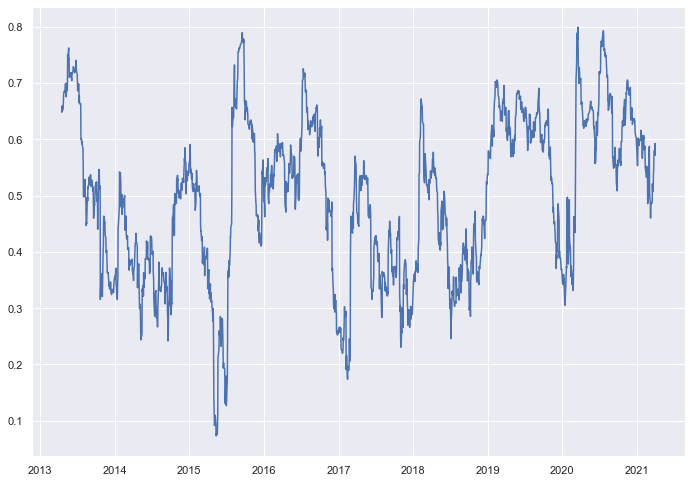

In [45]:
# calculate the rolling correlation and plot between oil and Aluminum

Oil_Alu_Pair_Rolling_correlation = df['Oil'].rolling(60).corr(df['Aluminum'])
plt.plot(Oil_Alu_Pair_Rolling_correlation)

<AxesSubplot:>

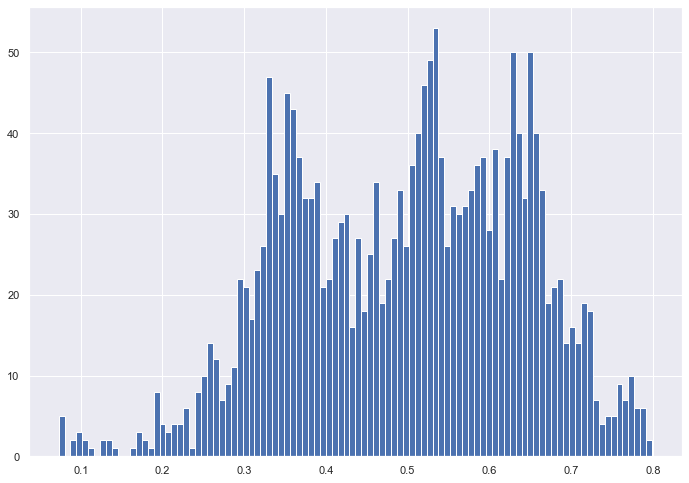

In [46]:
# plot the correlation distribution between the pair oil and Aluminum.
# overal positive relationship but the range is very large and unstable

Oil_Alu_Pair_Rolling_correlation.hist(bins = 100)

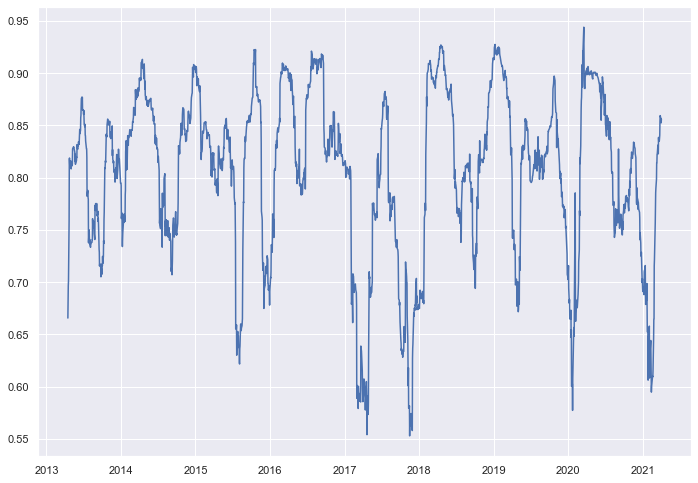

In [47]:
# calculate the rolling correlation and plot between oil and Aluminum

IT_Software_Pair_Rolling_correlation = df['Software'].rolling(60).corr(df['Information_Technology'])
plt.plot(IT_Software_Pair_Rolling_correlation)

<AxesSubplot:>

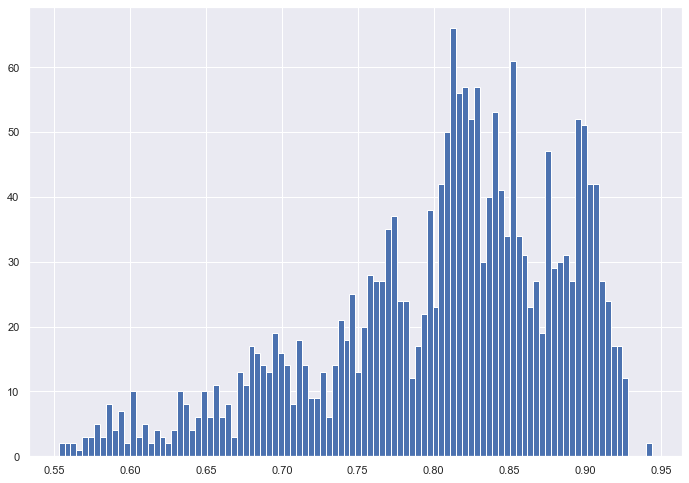

In [48]:
# plot the correlation distribution between the pair IT and software.
# overal positive relationship and the range is relatively small and stable

IT_Software_Pair_Rolling_correlation.hist(bins = 100)

# 3.2.2 Cointegration and Stationarity test

In contrast to correlation, cointegration does not reflect whether the pairs would move in the same or opposite direction, but can tell you whether the distance between them remains the same or stable over time. For investors, this means that the movement of these asset pairs is not related. However, in the longer term, the pairs may track a common average value. This analysis benefits market neutral strategy such as the pairs trading strategy, which capture the divergence within a pair assets as a statistical arbitrage opportunity as they will convrge in the long term. For example, assets A and B may not be correlated, but the return spread between A and B can be stable over time which provide arbitrage opportunity.

Step one: calculate the spread between paris sectors: example of Oil Aluminum Pair

Step two: test if the spread remain stationary with p value test

step three: visualisation

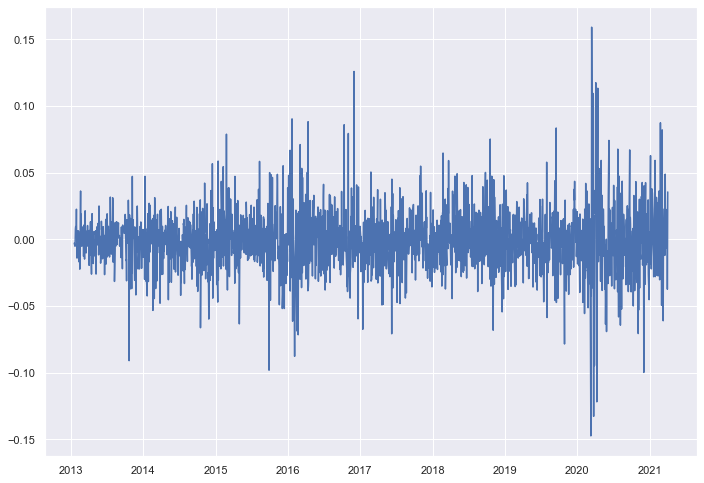

In [49]:
Oil_Alu_Pair_Spread = pd.DataFrame(df.Oil - df.Aluminum)
Oil_Alu_Pair_Spread.rename(columns={0: "Oil_Alu_Pair_Spread"},inplace = True)
plt.plot(Oil_Alu_Pair_Spread)

array([[<AxesSubplot:title={'center':'Oil_Alu_Pair_Spread'}>]],
      dtype=object)

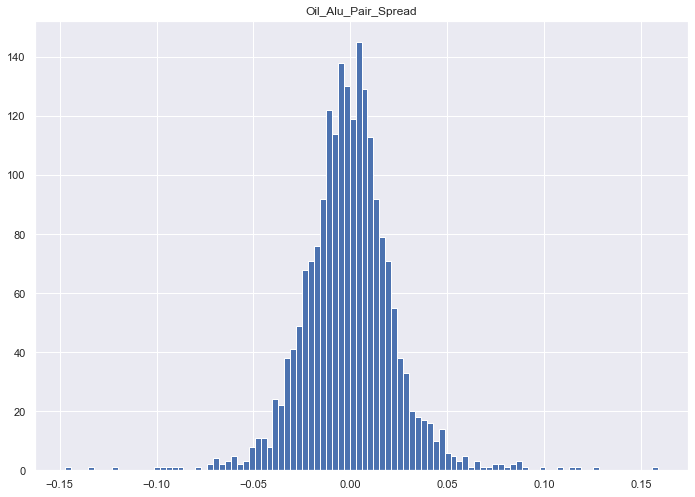

In [50]:
Oil_Alu_Pair_Spread.hist(bins = 100)

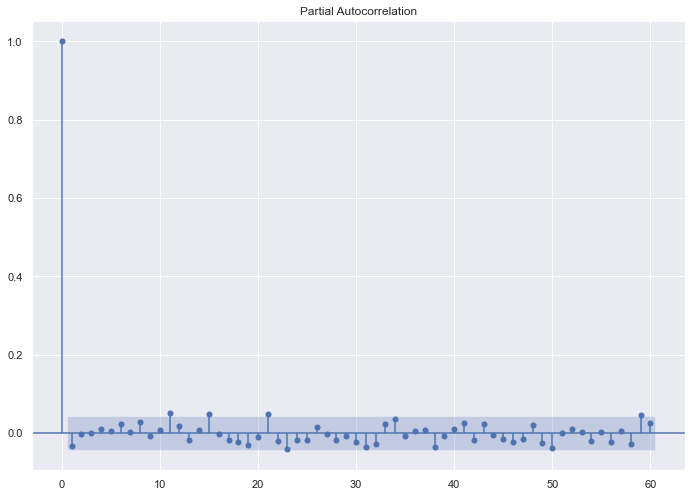

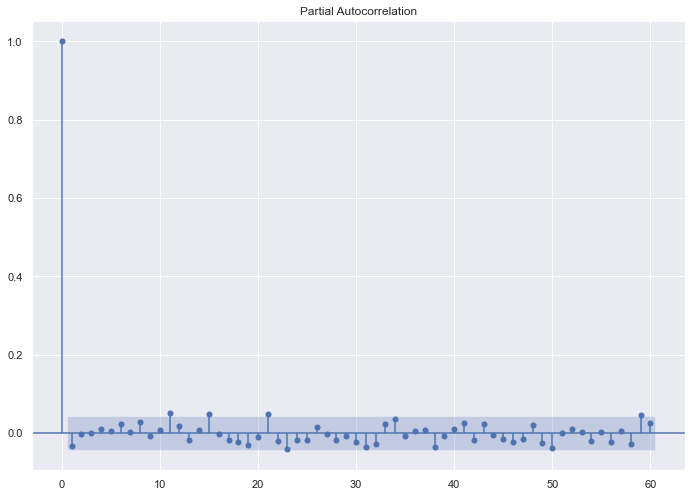

In [51]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(Oil_Alu_Pair_Spread, lags=60)

In [52]:
import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint, adfuller
import matplotlib.pyplot as plt

def check_for_stationarity(X, cutoff=0.01):
    # H_0 in adfuller is unit root exists (non-stationary)
    # We must observe significant p-value to convince ourselves that the series is stationary
    pvalue = adfuller(X)[1]
    if pvalue < cutoff:
        print ('p-value = ' + str(pvalue) + ' The spread series ' +'is likely stationary.')
        return True
    else:
        print ('p-value = ' + str(pvalue) + ' The spread series ' +'is likely non-stationary.')
        return False

In [53]:
# conclusion: based on the test, the return spread between oil and Aluminum tends to be stable from a long time persepctive. 
# Therefore, there is a good pairs trading opportunity between those two sector

check_for_stationarity(Oil_Alu_Pair_Spread);

p-value = 0.0 The spread series is likely stationary.


# Part Four:  Limitation and Assumption

1. Outlier detection: in addition to the above outlier detection method, we normally also need to check market events to check outliers such as corporate action, private placement and other issues. The check of market events will enrich the process of outlier detection. 


2. Sector Analytics: The above dependency analytics is purely based on machine learning and statistical methods. In reality, it is important to combine the above insight with economic expert knowledge and experience. For example, once we have identified the dependency relationship between sectors such as oil and Aluminum. It is more important to understand why those link actually exist? Is that because they located in the same supply chain network or other economic factors. This can help investor to predict if this statistical dependency will last in a long run and avoid the risk of dependency break due to the change of economic regime. For example, Phillips curve used to indicate a negative relationship between unemployment rate and inflation. However, due to the advancement of technology and outsource, this reverse dependency has been broken. Therefore, it is always important to link the statistical dependency with expert knowledge. 